<a href="https://colab.research.google.com/github/elliothebert/quantitative-analysis/blob/main/NLP_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2022-09-29 14:21:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2022-09-29 14:21:02 (105 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [5]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [3]:
df = pd.read_csv('/tmp/bbc-text.csv')
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [4]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [72]:
df['category'] = df['category'].astype('category')

y=df['category'].cat.codes

print(y)

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Length: 2225, dtype: int8


In [38]:
X=df['text']
y=df['category']


X.shape
y.shape

(2225,)

In [6]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [64]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [8]:
### Vocabulary size
voc_size=5000

In [9]:
messages=X.copy()

messages[1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [12]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[:10]

['tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen 

In [16]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2191,
  3674,
  2434,
  3382,
  3396,
  3222,
  4260,
  338,
  901,
  4885,
  2191,
  1148,
  4434,
  2021,
  4594,
  889,
  1414,
  2904,
  1878,
  3417,
  2191,
  79,
  1493,
  1765,
  3973,
  999,
  3679,
  4197,
  2735,
  2408,
  1191,
  1022,
  3335,
  3272,
  4628,
  4342,
  1954,
  3563,
  468,
  3974,
  4192,
  4198,
  37,
  3095,
  4864,
  205,
  4906,
  1998,
  380,
  3382,
  4523,
  3396,
  4503,
  1817,
  3176,
  1432,
  2007,
  274,
  1734,
  2670,
  731,
  1414,
  2953,
  4443,
  4192,
  4530,
  468,
  2187,
  1148,
  1772,
  4434,
  2021,
  4608,
  488,
  171,
  2194,
  3564,
  601,
  3095,
  566,
  1993,
  2440,
  4260,
  2181,
  1878,
  2021,
  1592,
  2902,
  344,
  4059,
  2280,
  2191,
  4906,
  1109,
  3999,
  468,
  2181,
  1330,
  3238,
  2191,
  1340,
  3464,
  901,
  4885,
  2191,
  171,
  3111,
  1040,
  1295,
  3095,
  4805,
  4658,
  2523,
  318,
  901,
  4885,
  4584,
  1878,
  4059,
  2280,
  3506,
  1340,
  1965,
  3010,
  4503,
  1242,
  3505,
  2999,


In [17]:
onehot_repr[1]

[2203,
 234,
 382,
 4187,
 3586,
 918,
 2203,
 234,
 4595,
 1640,
 2406,
 399,
 333,
 333,
 1846,
 4087,
 3252,
 305,
 3337,
 2197,
 4989,
 1882,
 2812,
 4193,
 3252,
 1211,
 2541,
 4469,
 2500,
 1490,
 583,
 1640,
 1625,
 2203,
 3100,
 741,
 2007,
 3777,
 1255,
 655,
 4795,
 1808,
 657,
 2135,
 819,
 583,
 4193,
 3038,
 2933,
 317,
 1846,
 4594,
 1255,
 4459,
 4469,
 2500,
 912,
 889,
 1387,
 640,
 4659,
 2461,
 3554,
 2072,
 2186,
 583,
 4193,
 3193,
 734,
 583,
 1640,
 1556,
 305,
 3337,
 1386,
 583,
 4193,
 4850,
 3193,
 2737,
 583,
 1640,
 1556,
 305,
 4261,
 2203,
 4187,
 583,
 889,
 383,
 4850,
 2197,
 583,
 4193,
 3570,
 1179,
 2377,
 305,
 4261,
 3919,
 918,
 2203,
 1574,
 2881,
 4218,
 4147,
 2880,
 4469,
 2500,
 1387,
 2515,
 583,
 2880,
 3570,
 1846,
 3291,
 386,
 257,
 2596,
 183,
 2203,
 305,
 1854,
 1695,
 583,
 1640,
 3470,
 3949,
 1928,
 4809,
 1713,
 234,
 4809,
 4727,
 4355,
 2350,
 1586,
 4083,
 583,
 1640,
 780,
 2203,
 2476,
 948,
 333,
 1432,
 401,
 4206,
 2547,


In [18]:
max_length=120
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=max_length)
print(embedded_docs)

[[2999 2434  583 ... 3417 1109 1109]
 [4193 3193  734 ... 4144 2419 2152]
 [2433 1033 1496 ... 2704 3252 2114]
 ...
 [4924 3666  411 ... 4742 4980 2309]
 [1847 3721 4880 ... 4480 2066 1940]
 [4483 2783  113 ...    0    0    0]]


In [65]:
embedding_vector_features=40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=120)),
model.add(Dropout(0.2)),
model.add(LSTM(100)),
model.add(Dropout(0.2)),
model.add(Dense(24, activation='relu')),
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 40)           200000    
                                                                 
 dropout (Dropout)           (None, 120, 40)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                2424      
                                                                 
 dense_3 (Dense)             (None, 6)                 150       
                                                                 
Total params: 258,974
Trainable params: 258,974
Non-t

In [56]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

((2225, 120), (2225,))

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=50)

In [70]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=100, verbose=1)

Epoch 1/20
16/16 [==============================] - 4s 264ms/step - loss: 0.6926 - accuracy: 0.7116 - val_loss: 0.6199 - val_accuracy: 0.7919
Epoch 2/20
16/16 [==============================] - 4s 243ms/step - loss: 0.6254 - accuracy: 0.7489 - val_loss: 0.5692 - val_accuracy: 0.7440
Epoch 3/20
16/16 [==============================] - 4s 259ms/step - loss: 0.5642 - accuracy: 0.7656 - val_loss: 0.5443 - val_accuracy: 0.8114
Epoch 4/20
16/16 [==============================] - 4s 254ms/step - loss: 0.5152 - accuracy: 0.8208 - val_loss: 0.5047 - val_accuracy: 0.8263
Epoch 5/20
16/16 [==============================] - 4s 249ms/step - loss: 0.4213 - accuracy: 0.8709 - val_loss: 0.4101 - val_accuracy: 0.8698
Epoch 6/20
16/16 [==============================] - 4s 255ms/step - loss: 0.3222 - accuracy: 0.9024 - val_loss: 0.3719 - val_accuracy: 0.8713
Epoch 7/20
16/16 [==============================] - 4s 258ms/step - loss: 0.2376 - accuracy: 0.9345 - val_loss: 0.4170 - val_accuracy: 0.8653
Epoch 

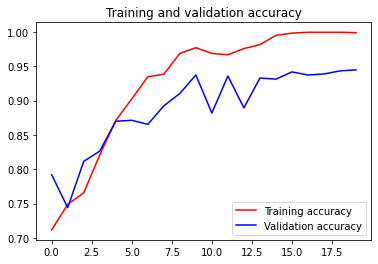

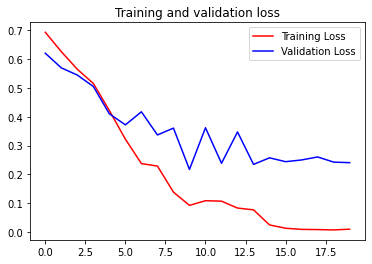

In [71]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()